In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


## Explore and Clean the Data

### Import the data

In [283]:
customer_info = pd.read_excel('data/Bank_Churn_Messy.xlsx', sheet_name='Customer_Info')
account_info = pd.read_excel('data/Bank_Churn_Messy.xlsx', sheet_name='Account_Info')

In [284]:
customer_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [285]:
account_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


### Join "Account_Info" to "Customer_Info"

In [286]:
customers = customer_info.merge(
    account_info,
    how="left",
    on="CustomerId"
)

### Removing duplicates

In [287]:
customers.duplicated().any()

np.True_

In [288]:
customers[customers.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [289]:
customers = customers.drop_duplicates().reset_index(drop=True)

In [290]:
customers.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0


### Check the data types for each column and make any necessary fixes

In [291]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure_x         10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  Tenure_y         10000 non-null  int64  
 12  IsActiveMember   10000 non-null  object 
 13  Exited           10000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [292]:
customers.Age = customers.Age.round().astype('Int64')

customers.EstimatedSalary = customers.EstimatedSalary.str.strip().str.strip('€')
customers.EstimatedSalary = pd.to_numeric(customers.EstimatedSalary,errors="coerce")

customers.Balance = customers.Balance.str.strip().str.strip('€')
customers.Balance = pd.to_numeric(customers.Balance,errors="coerce")

In [293]:
customers.HasCrCard = customers.HasCrCard.str.lower().str.replace('yes','1').str.replace('no','0')
customers.HasCrCard = pd.to_numeric(customers.HasCrCard, errors="coerce")
customers.HasCrCard = customers.HasCrCard.astype(bool)

In [294]:
customers.IsActiveMember = customers.IsActiveMember.str.lower().str.replace('yes','1').str.replace('no','0')
customers.IsActiveMember = pd.to_numeric(customers.IsActiveMember, errors="coerce")
customers.IsActiveMember = customers.IsActiveMember.astype(bool)

In [295]:
customers.Exited = customers.Exited.astype(bool)

In [296]:
customers.CustomerId = customers.CustomerId.astype(str)

### Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median

In [297]:
customers.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    3
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [298]:
customers.Surname = np.where(customers.Surname.isna(),'MISSING',customers.Surname)

In [299]:
customers.Age = np.where(customers.Age.isna(),customers.Age.median(),customers.Age)

In [300]:
customers.EstimatedSalary = np.where(customers.EstimatedSalary.isna(),customers.EstimatedSalary.median(),customers.EstimatedSalary)

### Profile the numeric columns in the data

In [301]:
num_cols = customers.select_dtypes(include="number").columns
print(num_cols)

Index(['CreditScore', 'Age', 'Tenure_x', 'EstimatedSalary', 'Balance',
       'NumOfProducts', 'Tenure_y'],
      dtype='object')


In [302]:
profile = customers[num_cols].describe()
print(profile)

        CreditScore           Age      Tenure_x  EstimatedSalary  \
count  10000.000000  10000.000000  10000.000000     10000.000000   
mean     650.528800     38.921500      5.012800    100092.265795   
std       96.653299     10.487552      2.892174     57510.146430   
min      350.000000     18.000000      0.000000        11.580000   
25%      584.000000     32.000000      3.000000     51002.110000   
50%      652.000000     37.000000      5.000000    100236.020000   
75%      718.000000     44.000000      7.000000    149388.247500   
max      850.000000     92.000000     10.000000    199992.480000   

             Balance  NumOfProducts      Tenure_y  
count   10000.000000   10000.000000  10000.000000  
mean    76485.889288       1.530200      5.012800  
std     62397.405202       0.581654      2.892174  
min         0.000000       1.000000      0.000000  
25%         0.000000       1.000000      3.000000  
50%     97198.540000       1.000000      5.000000  
75%    127644.240000   

In [303]:
customers[customers.EstimatedSalary < 0]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited


In [304]:
def iqr_outliers(column, factor=1.5):
    """
    Return a boolean mask where True = outlier based on IQR rule.

    column: pandas Series (numeric column)
    factor: multiplier on IQR (default 1.5)
    """
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - factor * iqr
    upper = q3 + factor * iqr

    # True for values below lower or above upper
    return (column < lower) | (column > upper)

In [305]:
iqr_outliers(customers.CreditScore).sum()
# TODO: what to make with credit score outliers? Are they valid or not?

np.int64(15)

### Check countries name

In [306]:
customers.Geography.value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [307]:
customers.Geography = customers.Geography.str.replace('French','France').str.replace('FRA','France')

In [308]:
customers.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

### A bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)

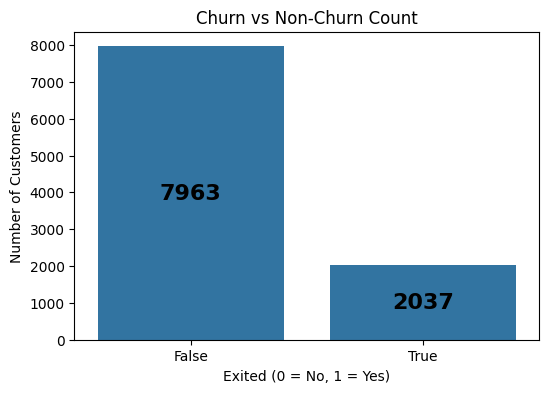

In [309]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=customers, x="Exited")

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container,
                label_type="center",
                fontsize=16,
                fontweight="bold")

plt.title("Churn vs Non-Churn Count")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")

plt.show()

In [310]:
print(customers["Exited"].value_counts())

Exited
False    7963
True     2037
Name: count, dtype: int64


### Explore the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”

#### Churn Rate by Geography

In [311]:
churn_by_geo = (
    customers
    .groupby("Geography")["Exited"]
    .mean()              # average of 0/1 = churn rate
    .mul(100)            # turn into %
    .round(2)
    .reset_index(name="ChurnRatePercent")
)

print(churn_by_geo)

  Geography  ChurnRatePercent
0    France             16.15
1   Germany             32.44
2     Spain             16.67


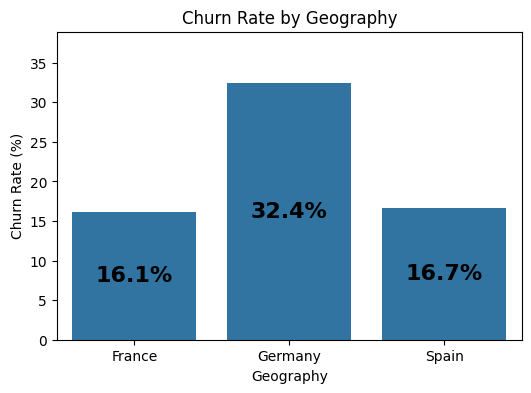

In [312]:
# Churn rate by Geo Barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=churn_by_geo,
    x="Geography",
    y="ChurnRatePercent"
)

for container in ax.containers:
    ax.bar_label(
        container,
        label_type="center",
        fmt="%.1f%%",
        fontsize=16,
        fontweight="bold"
    )

plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Geography")
plt.ylim(0, churn_by_geo["ChurnRatePercent"].max() * 1.2)

plt.show()

#### Churn Rate by Gender

In [313]:
churn_by_gender = (
    customers
    .groupby("Gender")["Exited"]
    .mean()
    .mul(100)
    .round(2)
    .reset_index(name="ChurnRatePercent")
)

print(churn_by_gender)

   Gender  ChurnRatePercent
0  Female             25.07
1    Male             16.46


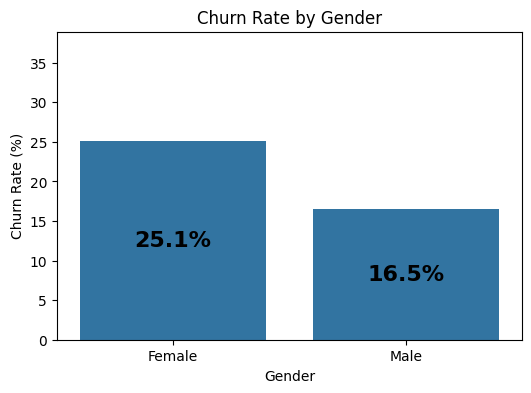

In [314]:
# Churn rate by Gender Barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=churn_by_gender,
    x="Gender",
    y="ChurnRatePercent"
)

for container in ax.containers:
    ax.bar_label(
        container,
        label_type="center",
        fmt="%.1f%%",             # format as percentage, e.g. 23.4%
        fontsize=16,
        fontweight="bold"
    )

plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Gender")
plt.ylim(0, churn_by_geo["ChurnRatePercent"].max() * 1.2)

plt.show()

### Box plots for each numeric field, broken out by churners vs. non-churners

['CreditScore', 'Age', 'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'Tenure_y']


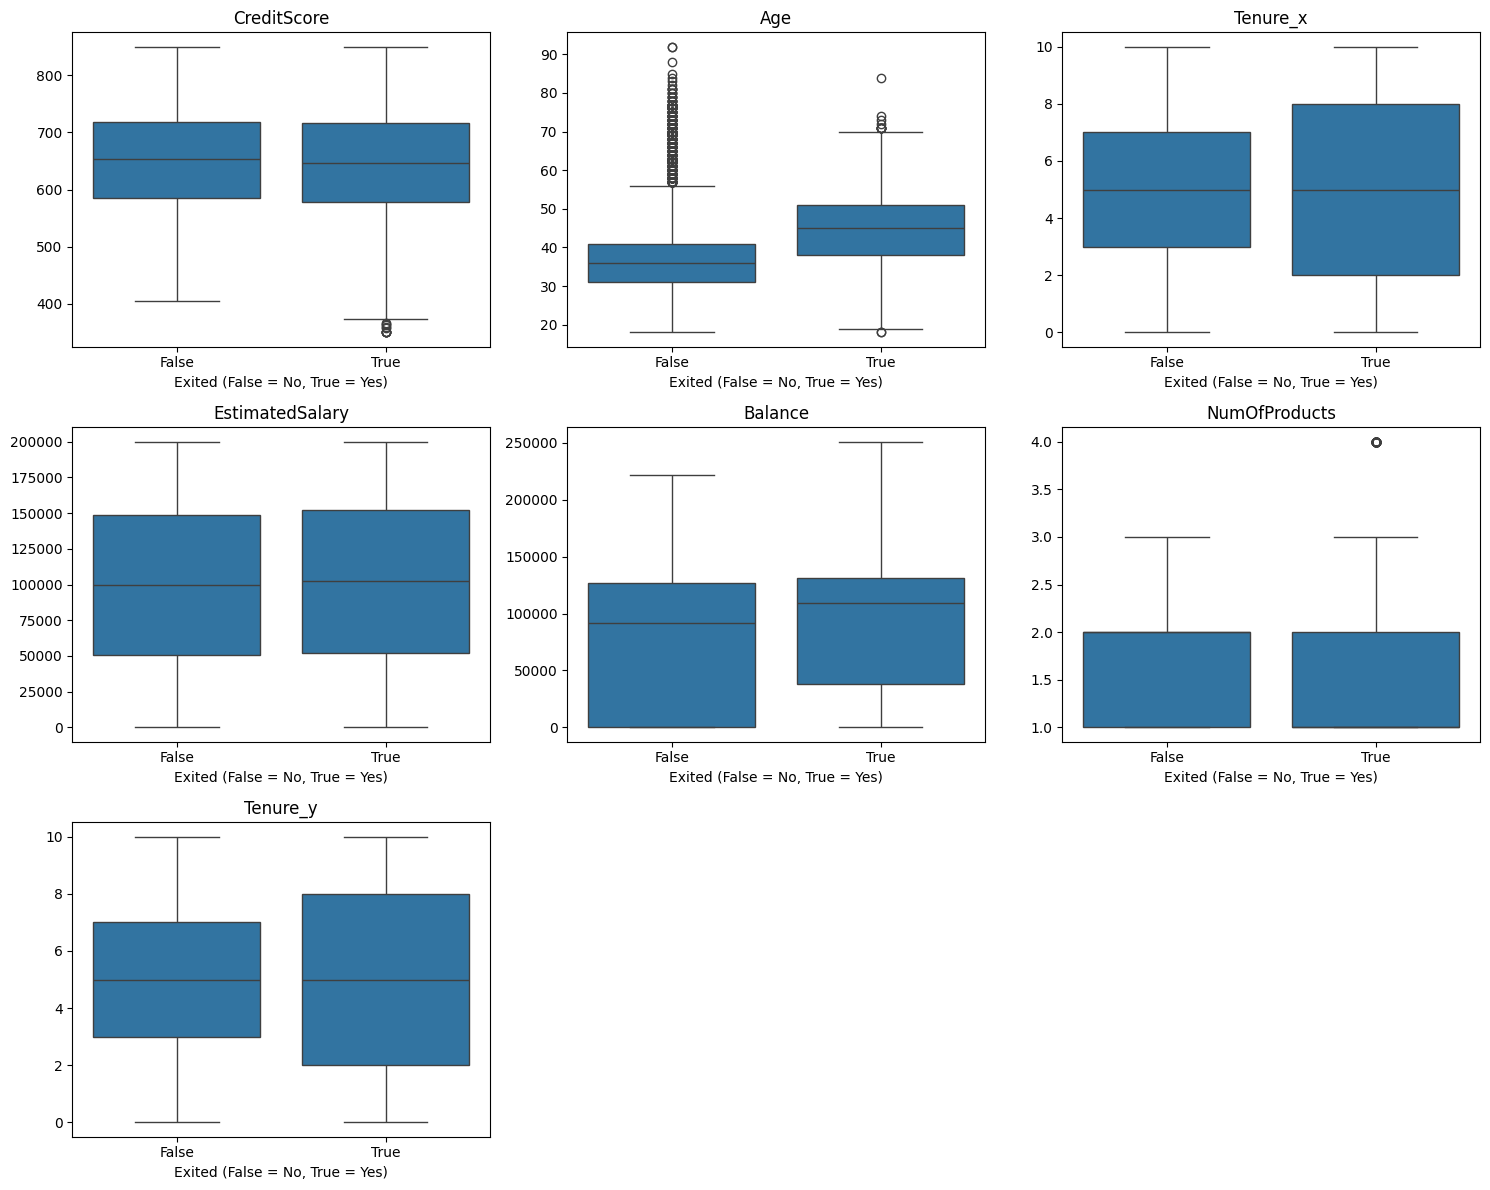

In [315]:
# 1. Get numeric columns except the target
num_cols = customers.select_dtypes(include="number").columns
num_cols = [c for c in num_cols if c != "Exited"]
print(num_cols)   # should show 7 columns

# 2. Set up a 3x3 grid (for 7 columns)
n = len(num_cols)     # 7
ncols = 3
nrows = math.ceil(n / ncols)   # -> 3

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), squeeze=False)

for i, col in enumerate(num_cols):
    r = i // ncols
    c = i % ncols
    ax = axes[r][c]

    sns.boxplot(
        data=customers,
        x="Exited",      # churn vs non-churn
        y=col,
        ax=ax
    )

    ax.set_title(col)
    ax.set_xlabel("Exited (False = No, True = Yes)")
    ax.set_ylabel("")

# 3. Hide any unused subplot cells (there will be 2 empty)
for j in range(i + 1, nrows * ncols):
    r = j // ncols
    c = j % ncols
    fig.delaxes(axes[r][c])

plt.tight_layout()
plt.show()

## Prepare for Modeling

In [316]:
customers.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')

In [319]:
cols_to_drop = ["CustomerId", "Surname", "Tenure_y"]
customers_model = customers.drop(columns=cols_to_drop).copy()
customers_model.head()
customers_model.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure_x',
       'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

### Create dummy variables for categorical fields

In [320]:
customers_dummies = pd.get_dummies(
    customers_model,
    columns=["Geography", "Gender"],
    drop_first=True # avoid dummy trap (drop one category per field)
)
X = customers_dummies.drop(columns=["Exited"]) #because Exited is Y
y = customers_dummies["Exited"]

### A new "balance_v_income" feature

In [344]:
# Work on a clean copy to avoid chained assignment issues
customers = customers.copy()

# Create the new feature
customers["balance_v_income"] = customers["Balance"] / customers["EstimatedSalary"]

# Replace +/- inf with NaN
customers["balance_v_income"] = customers["balance_v_income"].replace(
    [np.inf, -np.inf], np.nan
)

# Drop rows where balance_v_income or Exited is missing (for plotting)
plot_df = customers.dropna(subset=["balance_v_income", "Exited"]).copy()

# Check outliers
customers["balance_v_income"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

lower = 0
upper = customers["balance_v_income"].quantile(0.99)

# True where value is an outlier
outlier_mask = (customers["balance_v_income"] < lower) | (customers["balance_v_income"] > upper)

outlier_mask.sum()   # how many outliers

np.int64(100)

In [345]:
customers["balance_v_income"] = customers["balance_v_income"].clip(lower=lower, upper=upper)
# New statistic
customers["balance_v_income"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    10000.000000
mean         1.865448
std          4.669869
min          0.000000
50%          0.747002
75%          1.514022
90%          3.674504
95%          7.249500
99%         35.484626
max         35.484709
Name: balance_v_income, dtype: float64

### Visualize balance_v_income vs. churn status

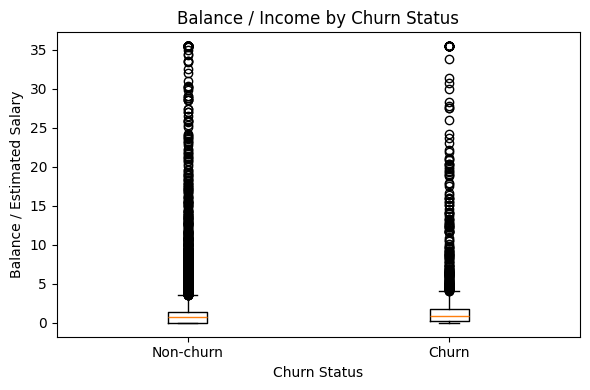

In [346]:
non_churn = customers.loc[customers["Exited"] == 0, "balance_v_income"].dropna()
churn = customers.loc[customers["Exited"] == 1, "balance_v_income"].dropna()

plt.figure(figsize=(6, 4))

plt.boxplot(
    [non_churn, churn],
    positions=[1, 2],                     # 2 groups → 2 positions
    tick_labels=["Non-churn", "Churn"]
)
plt.title("Balance / Income by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Balance / Estimated Salary")
plt.tight_layout()
plt.show()



### Explanation
 - Most points are very close to 0–1 (small ratio of balance to income).
 - There’s a long right tail (those circles above the boxes) where people have much higher balance relative to income.
 - Both churners and non-churners show the same basic pattern; there're churners with a slightly higher median / spread, but it’s not a big difference.

The engineered feature balance_v_income (Balance / EstimatedSalary) is highly right-skewed, with many customers near zero and a long tail of high ratios. Boxplots by churn status show broadly similar distributions between churners and non-churners, with churners having a slightly higher median ratio. This suggests that balance relative to income may have some but not a dominant relationship with churn.